<a href="https://colab.research.google.com/github/momo4201/AI-ML-projects/blob/main/deep_learning_concept_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CROSS ENTROPY**
logarithmic loss or log loss, is a popular loss function used in machine learning to measure the performance of a classification model.We can measure the error between two probability distributions using the cross-entropy loss function. For example, let’s assume we’re conducting a binary classification task (a classification task with two classes, 0 and 1).

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
 # create training data
X, y = make_classification(
    n_samples=10000,
    n_informative=10,
    random_state=2022
)
# split into train and test
X_new, X_test = X[:9000, :], X[9000:, ]
y_new, y_test = y[:9000], y[9000:]

X_train, X_val, y_train, y_val = train_test_split(
    X_new, y_new,
    test_size=0.3
)
print(f"Train data: {X_train.shape}\n\
Train labels: {y_train.shape}\n\
Test data: {X_test.shape}\n\
Test labels: {y_test.shape}")


Train data: (6300, 20)
Train labels: (6300,)
Test data: (1000, 20)
Test labels: (1000,)


In [ ]:
import torch

print(torch.__version__)
import torch.nn as nn

2.6.0+cu124


In [ ]:
###Cross-entropy in PyTorch

# convert numpy arrays to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

#build the model
input_dim = X_train.shape[1]
hidden_dim = 10
output_dim = 1

model = nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim),
    nn.Sigmoid()
    )
print(model)

Sequential(
  (0): Linear(in_features=20, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)


Epoch 1/20 | Train Loss: 0.6344 | Val Loss: 0.6334
Epoch 2/20 | Train Loss: 0.6327 | Val Loss: 0.6317
Epoch 3/20 | Train Loss: 0.6309 | Val Loss: 0.6300
Epoch 4/20 | Train Loss: 0.6292 | Val Loss: 0.6282
Epoch 5/20 | Train Loss: 0.6274 | Val Loss: 0.6265
Epoch 6/20 | Train Loss: 0.6256 | Val Loss: 0.6247
Epoch 7/20 | Train Loss: 0.6238 | Val Loss: 0.6229
Epoch 8/20 | Train Loss: 0.6220 | Val Loss: 0.6211
Epoch 9/20 | Train Loss: 0.6201 | Val Loss: 0.6192
Epoch 10/20 | Train Loss: 0.6183 | Val Loss: 0.6173
Epoch 11/20 | Train Loss: 0.6164 | Val Loss: 0.6154
Epoch 12/20 | Train Loss: 0.6145 | Val Loss: 0.6135
Epoch 13/20 | Train Loss: 0.6125 | Val Loss: 0.6116
Epoch 14/20 | Train Loss: 0.6106 | Val Loss: 0.6096
Epoch 15/20 | Train Loss: 0.6086 | Val Loss: 0.6076
Epoch 16/20 | Train Loss: 0.6066 | Val Loss: 0.6056
Epoch 17/20 | Train Loss: 0.6046 | Val Loss: 0.6036
Epoch 18/20 | Train Loss: 0.6025 | Val Loss: 0.6015
Epoch 19/20 | Train Loss: 0.6005 | Val Loss: 0.5994
Epoch 20/20 | Train L

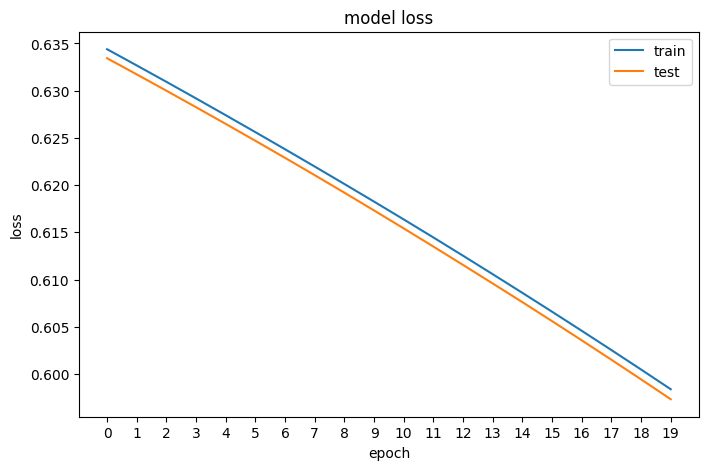

In [ ]:
#define the binary cross-entropy loss function and optimizer
loss_fn = nn.BCELoss() #binary cross entropy
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

import numpy as np
# === Training Loop ===
num_epochs = 20
train_loss = []
val_loss = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_val_tensor)
        val = loss_fn(y_val_pred, y_val_tensor)

    train_loss.append(loss.item())
    val_loss.append(val.item())

    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {loss.item():.4f} | Val Loss: {val.item():.4f}")

## plotting the loss of the models
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0,20, step=1))
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Understanding computational graph
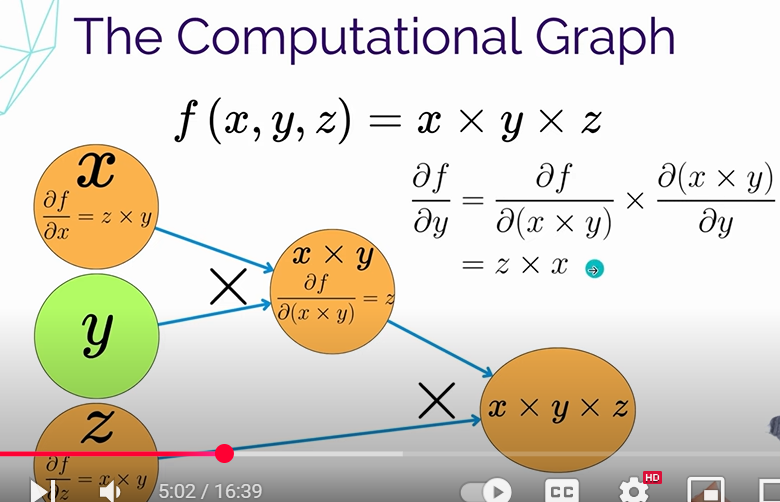

In [ ]:
import torch
x = torch.tensor([2.0], requires_grad = True)
y = torch.tensor([3.0], requires_grad = True)
z = torch.tensor([4.0], requires_grad = True)
###perform operation
f = x*y*z #(f (x, y,z)= x*y*z)

###compute gradients
f.backward()
print(f"Gradient df/dx:{x.grad}")
print(f"Gradient df/dy:{y.grad}")
print(f"Gradient df/dz:{z.grad}")

#gradients: df/dx = y*z, df/dy = x*z, df/dz = x*y



Gradient df/dx:tensor([12.])
Gradient df/dy:tensor([8.])
Gradient df/dz:tensor([6.])


In [ ]:
def h(x):
  return x**2
def f(y):
  return y+1

#define tensors
x = torch.tensor(2.0, requires_grad=True)
#define computational blocks
y = h(x)
z = f(y)
#compute gradients
z.backward()
print("gradient of z w.r.t x:", x.grad)    ##z = x**2+1, x= 2


gradient of z w.r.t x: tensor(4.)


#**SGD** and optimization techniques

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**2 #objective function
def f_grad(x):
  return 2*x  # gradient of the objective function

def gd (lr, f_grad):
  x = 10.0 #initial solution
  results = [x]
  for i in range (5):
    x = x - lr * f_grad(x)
    results.append(float(x))
  return results

In [ ]:
def show_trace(results,f):
  #define the range of plot based on solution
  n = max(abs(min(results)), abs(max(results)))
  f_line = np.arange(-n, n, 0.1)

  plt.plot(f_line, [f(x) for x in f_line],'r-', label ='function f(x)') #plot the function
  plt.plot(results, [f(x) for x in results],'bo-', label ='gradient descent')   #plot the solution

  for i, x in enumerate(results):
    plt.text(x, f(x), f'{i}', color = 'blue',fontsize = 10, ha ='right', va ='bottom')

  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()
  plt.tight_layout()
  plt.show()



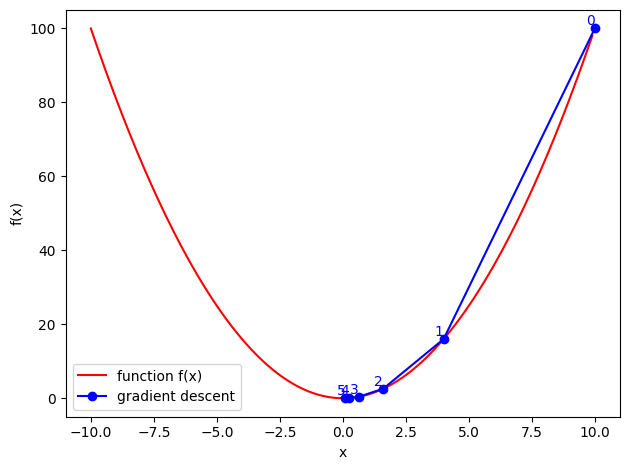

In [ ]:
show_trace(gd(0.3,f_grad),f)   ### u can check the graph by putting 0.02 or different number instead of 0.2 which is our lr)

In [ ]:
#GDP data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv")
df.head()

X = df['GDP per capita (USD)'].to_numpy()
y = df['Life satisfaction'].to_numpy()

def add_column(X):
    return np.concatenate((np.ones((X.shape[0], 1)), X.reshape(-1, 1)), axis=1)  #add the column of all 1's

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X.reshape(-1, 1))
X_con = add_column(X_minmax)
print(X_con[:3])


[[1.         0.        ]
 [1.         0.02459182]
 [1.         0.05709406]]


In [ ]:
lr = 0.01
n_epochs = 1000
N = len(X_con)  #number of instances

np.random.seed(3)
theta = np.random.randn(2,1)  ## randomly initialize moddel parameters

for epoch in range(n_epochs):
  gradients = 2/N * X_con.T @ (X_con @ (theta) - y.reshape(-1, 1))
  theta = theta - lr * gradients

print(theta)



[[5.54877943]
 [2.27673633]]


Text(0, 0.5, 'Life satisfaction')

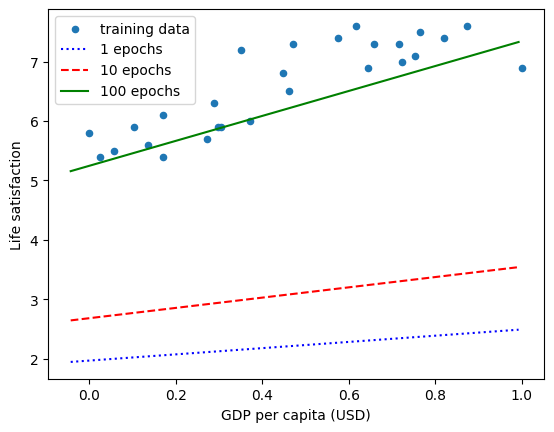

In [ ]:
##impact of lr
np.random.seed(3)
theta = np.random.randn(2,1)  ## randomly initialize moddel parameters

X_test= np.array([25000, 60000]).reshape(-1, 1)
X_test_minmax = minmax.transform(X_test)
X_test_con = add_column(X_test_minmax)

plt.scatter(X_minmax, y, s=20, label='training data')
lr = 0.01
for epoch in range(n_epochs):
  gradients = 2/N * X_con.T @ (X_con @ (theta) - y.reshape(-1, 1))
  theta = theta - lr * gradients
  if epoch ==1:
    plt.plot(X_test_con[:,1], X_test_con @ theta, 'b:', label = '1 epochs')
  elif epoch == 10:
    plt.plot(X_test_con[:,1], X_test_con @ theta, 'r--' , label = '10 epochs')
  elif epoch == 100:
    plt.plot(X_test_con[:,1], X_test_con @ theta, 'g-', label = '100 epochs')

plt.legend()
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")




In [ ]:
#SGD
n_epochs = 5
t0, t1 = 5, 50 #learning schedule hyperparameters
def learning_schedule (t):
  return t0 /(t+t1)
np.random.seed(42)
theta = np.random.randn(2,1)

#loop over the individual data points
for epoch in range(n_epochs):
  for iteration in range(N):  #(n/B, B=1)
    random_index = np.random.randint(N) #select a random indexfor the current data point
    #extract xi and yi
    xi = np.transpose(X_con[random_index : random_index + 1 ])
    yi = y[random_index : random_index + 1]
    #compute the gradient of loss function
    gradients = 2 * xi @(xi.T @ theta - yi)  # for sgd don't divide by N
    #the learning schedule decreases the lr rate over the time
    lr = learning_schedule(epoch*N + iteration)
    # update theta
    theta = theta - lr * gradients

print(theta)







[[5.56898107]
 [2.27782555]]


In [ ]:
from sklearn.pipeline import Pipeline   #use for data transformation
from sklearn.linear_model import SGDRegressor

X = df['GDP per capita (USD)'].to_numpy().reshape(-1,1)
y = df['Life satisfaction'].to_numpy()

pipe = Pipeline([('Preprocess', MinMaxScaler()),('reg', SGDRegressor(random_state = 42))])

pipe.fit(X,y)
print(pipe['reg'].intercept_, pipe['reg'].coef_)

[5.35324059] [2.47088247]


# **Learning rate Scheduling (step wise decay)**

In [ ]:
import torch
#set seed
torch.manual_seed(0)
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
# step 1: loading dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),
                            download=True)
test_dataset = datasets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


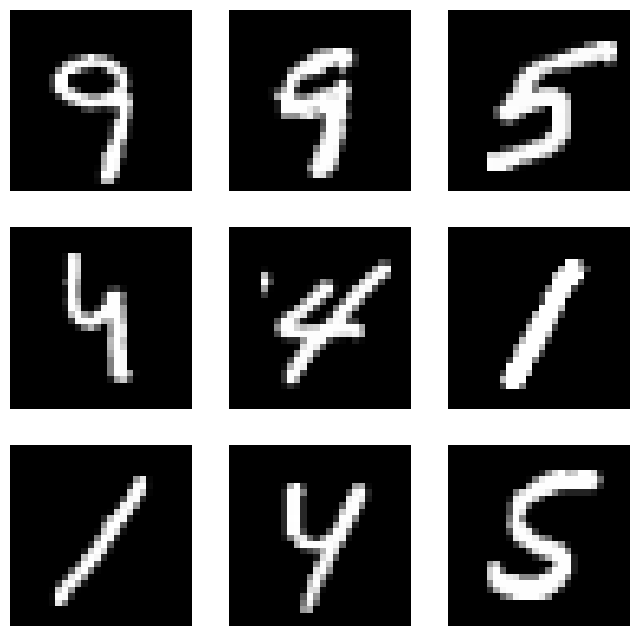

In [ ]:
#visualizing data
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
#STEP 2: MAKING DATASET ITERABLE
from torch.utils.data import DataLoader
import torch.nn as nn

batch_size = 100
n_iters = 3000
num_epochs = n_iters/(len(train_dataset)/batch_size)
num_epochs = int(num_epochs)

train_loader = DataLoader(dataset = train_dataset,
                                           batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = test_dataset,
                                           batch_size = batch_size, shuffle = False)

#step 3: create model class
class FeedforwardNeuralNetModel(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super(FeedforwardNeuralNetModel, self).__init__()
    #linear function
    self.fc1 = nn.Linear(input_dim, hidden_dim)
    #nonlinearity
    self.relu = nn.ReLU()
    #linear function (read out)
    self.fc2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    #linear function
    out = self.fc1(x)
    #nonlinearity
    out = self.relu(out)
    #linear function (read out)
    out = self.fc2(out)
    return out

#step 4: instantiate model class
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

#step 5: INSTANTIATE LOSS CLASS
criterion = nn.CrossEntropyLoss()

#STEP 6: INSTANTIATE OPTIMIZER CLASS
learning_rate =0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9, nesterov=True)

'''
STEP 7: INSTANTIATE STEP LEARNING SCHEDULER CLASS
'''
# step_size: at how many multiples of epoch you decay
# step_size = 1, after every 1 epoch, new_lr = lr*gamma
# step_size = 2, after every 2 epoch, new_lr = lr*gamma

# gamma = decaying factor
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)

#STEP 8: TRAIN THE MODEL
iter = 0
for epoch in range(num_epochs):
  #decay learning rate
  scheduler.step()
  # Print Learning Rate
  print('epoch:', epoch,'LR:', scheduler.get_last_lr())
  for i, (images, labels) in enumerate(train_loader):
    #load images as variables
    images = images.view(-1, 28*28)
    #clear gradients w.r.t parameter
    optimizer.zero_grad()

    # Forward pass to get output/logits
    outputs = model(images)

    ## Calculate Loss: softmax --> cross entropy loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    iter+= 1
    if iter %500 == 0:
      #calculate accuracy
      correct = 0
      total = 0
      #iterate through test dataset
      for images, labels in test_loader:
        # Load images to a Torch Variable
        images = images.view(-1, 28*28).requires_grad_()
        # Forward pass only to get logits/output
        outputs = model(images)
        # Get predictions from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        # Total number of labels
        total += labels.size(0)
        # Total correct prediction
        correct += (predicted == labels).sum()
      accuracy = 100 * correct / total
       # Print Loss\
      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))









epoch: 0 LR: [0.010000000000000002]


KeyboardInterrupt: 

In [ ]:
#### Tensor flow example:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

# Define your learning rate schedule function
def step_decay(epoch):
    initial_lr = 0.1
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lr

# Create your model
model = create_model()

# Define your optimizer with an initial learning rate of 0.0
sgd = SGD(lr=0.0, momentum=0.9)

# Define a learning rate scheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

# Compile your model with the optimizer and other necessary configurations
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model with the learning rate scheduler callback
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=[lr_scheduler])

NameError: name 'create_model' is not defined

# **ADAM optimizer in pytorch**



In [ ]:
# Import necessary modules
import torch
import torch.nn as nn
import torch.optim as optim
# Define your model
model = nn.Sequential(
   nn.Linear(10, 50),
   nn.ReLU(),
   nn.Linear(50, 1)
)
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
# Training loop
for epoch in range(num_epochs):
   for batch in dataloader:
       # Zero the gradients
       optimizer.zero_grad()

       # Forward pass
       outputs = model(batch)
       loss = criterion(outputs, targets)

       # Backward pass
       loss.backward()

       # Update weights
       optimizer.step()
# Adjusting learning rate
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
for epoch in range(num_epochs):
   train(...)
   scheduler.step()

Exception ignored in: <function _xla_gc_callback at 0x7f1cb0e66700>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


KeyboardInterrupt: 

# Introduction to keras

In [ ]:
import keras

In [ ]:
keras.__version__

'3.8.0'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=5, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,789 (26.52 KB)

 Trainable params: 6,789 (26.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
config = (Dense(units=10, activation='relu', input_dim=100), (Dense(units=5, activation='softmax')))
model2 = Sequential(config)
model2.summary()

NameError: name 'Dense' is not defined

In [ ]:
def my_model (nl, nn, input_dim, output_dim):
  model = Sequential([Dense(units=nn, activation='relu', input_dim=input_dim)])

  for i in range(nl):
    model.add(Dense(units=nn, activation='relu'))

  model.add(Dense(units=output_dim, activation='softmax'))
  return model



In [ ]:
model3 = my_model(5,4,100,5)

In [ ]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │           404 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529 (2.07 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#adding parameters
model.compile(loss='categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])     #MSE, categorical_ cross entropy

# fashion-mnist-with-keras

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#understanding the data format
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
set(test_labels)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

Label: 4


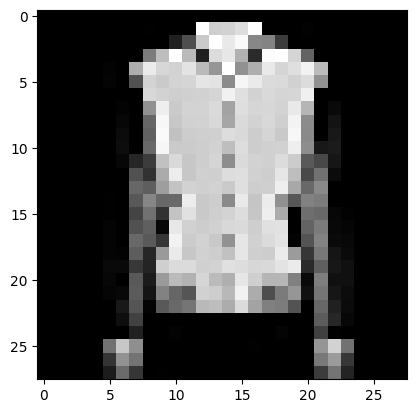

In [ ]:
#visualize the data
%matplotlib inline
import random
import matplotlib.pyplot as plt

i = random.randint(0, 100)

print("Label:", train_labels[i])
plt.imshow(train_images[i], cmap = 'gray')


In [ ]:
TRAINING_SIZE = len(train_images)
TEST_SIZE= len(test_images)

#reshape from(N, 28,28) to (N, 28*28 = 784)
train_images = np.reshape(train_images, (TRAINING_SIZE, 784))
test_images = np.reshape(test_images, (TEST_SIZE, 784))

#convert the array to float32 as opposed to unit8)
train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

#converts the pixel value from integers between 0 and 255 to floats b/w 0 and 1
train_images /= 255
test_images /= 255




In [ ]:
## reformat the labels
NIM_CAT = 10
print("Before", train_labels[0])# the format of the label before conversion
train_labels_ = tf.keras.utils.to_categorical(train_labels, NIM_CAT)
print("After", train_labels_[0])
test_labels_ = tf.keras.utils.to_categorical(test_labels, NIM_CAT)

Before 9
After [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
#build the model: the hidden layer will have 512 units using the RELU activation function,
#output layer will have 10 units and use softmax function
#loss function: categorical crossentropy, SGD optimizer


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation = tf.nn.relu,
                                input_dim = (784)))
model.add(tf.keras.layers.Dense(NIM_CAT, activation = tf.nn.softmax))

opt = tf.keras.optimizers.SGD(learning_rate=0.1)

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd',
              metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##TRAINING
train_labels_.shape


(60000, 10)

In [ ]:
model.fit(train_images, train_labels_, epochs = 7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8605 - loss: 0.4006
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8633 - loss: 0.3904
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8693 - loss: 0.3778
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8713 - loss: 0.3673
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8755 - loss: 0.3565
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8766 - loss: 0.3504
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8816 - loss: 0.3417


In [ ]:
##testing
loss, accuracy= model.evaluate(test_images, test_labels_)
print("Test loss:", loss)
print("Test accuracy: ", (accuracy))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8695 - loss: 0.3823
Test loss: 0.3884527385234833
Test accuracy:  0.8640000224113464


# Transfer learning

In [ ]:
##loading the pre-trained model
from keras.applications.vgg16 import VGG16
conv_base= VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
##preparation of model
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
model.add(conv_base)
model.add(Flatten())
#add fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#freezing the weights of pretrained model
conv_base.trainable = False

In [ ]:
###image loading
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds  = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
##normalise
def process(image, label):
  image = tensorflow.cast(image/255. , tensorflow.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

NotFoundError: Could not find directory /content/train

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)



NameError: name 'train_ds' is not defined

In [ ]:
##plotting the graph
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

## training loss vs validation loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


**In above case you will face overfitting problem because of your training accuracy is high and validation accuracy is low.**
Here if you perform augmentation first and then retrain the model, it will reduce overfitting as well as increase the validation accuracy and also decreases the validation loss.

# Feature Extraction using Augmentation


In [ ]:
## step 1: loading VGG16 data
## step 2: model preparation
## step 3: freeze the convolutional weights
### step 4 : performing augmentation and loading the images
from keras.preprocessing.image import ImageDataGenarator, array_to_img, img_to_array, load_img
batch_size = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode='binary')

##step 5: training the model
